# Sales prediction system using Linear Regression and KNN Regressor

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
dataframe = pd.read_csv(r'sales_prediction_dataset/train.csv') #raw string, treat everything as it is 

### Analysing and understanding the dataset

In [3]:
#complete information of the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#shape of the dataframe
dataframe.shape

(8523, 12)

In [5]:
dataframe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#converting dataframe columns to same case - lowercase
dataframe.columns = dataframe.columns.str.lower()

In [7]:
#complete information of the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#checking unique values
#how many unique values are in column
dataframe.nunique()

item_identifier              1559
item_weight                   415
item_fat_content                5
item_visibility              7880
item_type                      16
item_mrp                     5938
outlet_identifier              10
outlet_establishment_year       9
outlet_size                     3
outlet_location_type            3
outlet_type                     4
item_outlet_sales            3493
dtype: int64

In [9]:
dataframe.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#checking null values
#how many null values are in column and in which columns
dataframe.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

<AxesSubplot:>

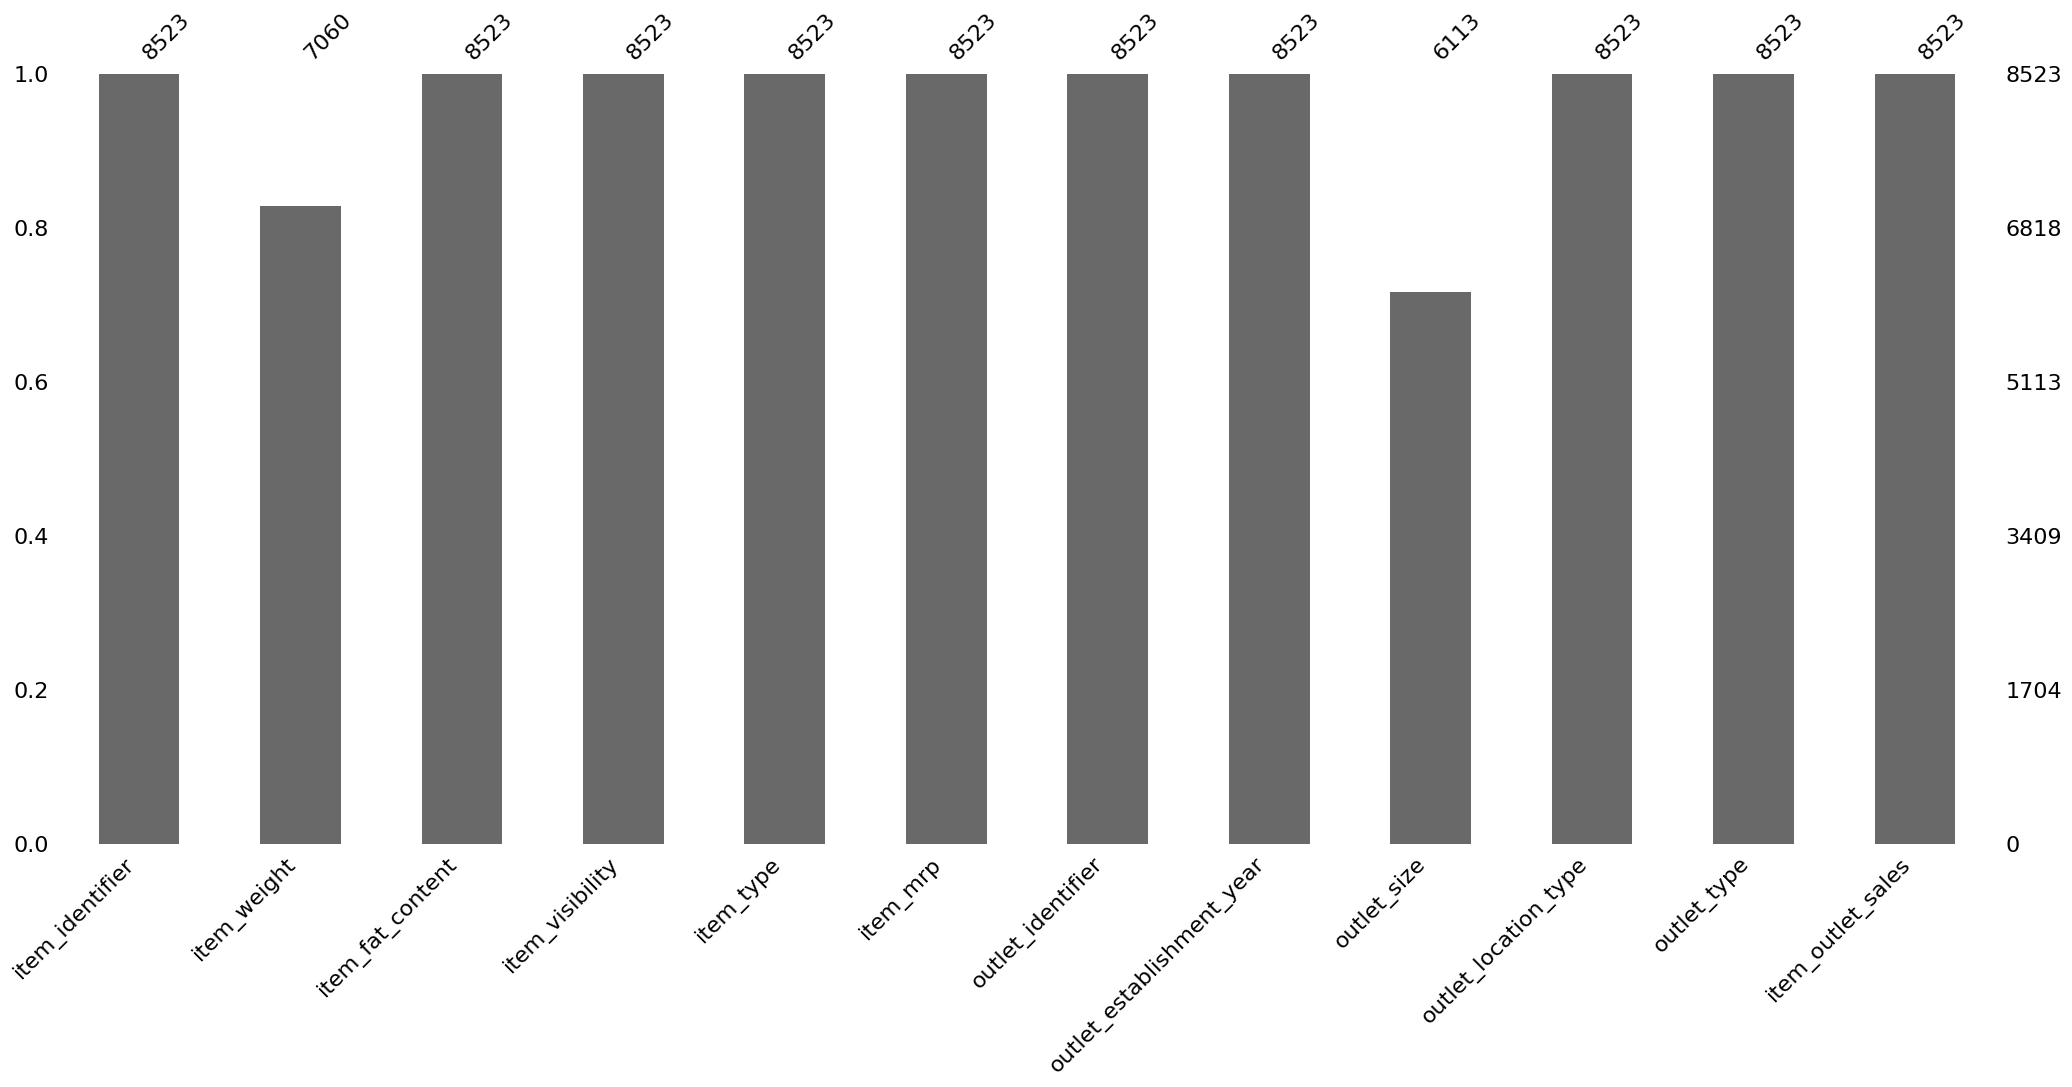

In [11]:
#checking missing values through visualization
import missingno as msn

msn.bar(dataframe)

item_weight and outlet_size have missing values

### Handling missing values

In [12]:
#handling missing values for item_weight
dataframe['item_type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [13]:
#number of unique values in the column item_type
dataframe['item_type'].nunique()

16

In [14]:
#Function to calculate total null values in a column according to the unique values in the column
#Best suitable for categorical values

column_name = dataframe['item_type'] #column name

def null_value_count_column_item(dataframe, column):
    dataframe_null = {}
    uniqueItems = column.unique()
    sNo = 1
    
    for item in uniqueItems:

        dataframe_null[item] = (dataframe[column_name == item].isna()).sum()
        print(f'{sNo}. {item}')
        print(dataframe_null[item])
        print()
        sNo+=1
    

In [15]:
#calling the function
null_value_count_column_item(dataframe, column_name)

1. Dairy
item_identifier                0
item_weight                  116
item_fat_content               0
item_visibility                0
item_type                      0
item_mrp                       0
outlet_identifier              0
outlet_establishment_year      0
outlet_size                  186
outlet_location_type           0
outlet_type                    0
item_outlet_sales              0
dtype: int64

2. Soft Drinks
item_identifier                0
item_weight                   71
item_fat_content               0
item_visibility                0
item_type                      0
item_mrp                       0
outlet_identifier              0
outlet_establishment_year      0
outlet_size                  133
outlet_location_type           0
outlet_type                    0
item_outlet_sales              0
dtype: int64

3. Meat
item_identifier                0
item_weight                   88
item_fat_content               0
item_visibility                0
item_type       

In [16]:
uniqueItems = dataframe['item_type'].unique()
uniqueItems

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
#filling the missing values of item_weight according to the unique values from item_type respectively
uniqueItems = dataframe['item_type'].unique()
selectItem = {}
print('Mean of items in item_type: (The mean of values are different when the values were null and now when filled ) ')
print('This shows the mean after the missing values have been handled')
print()
for item in uniqueItems:
    
    selectItem = (dataframe[dataframe['item_type'] == item])
    fillItemWeight = selectItem['item_weight'].mean()
    dataframe['item_weight'] = dataframe['item_weight'].fillna(value=fillItemWeight, inplace=False)
    print(f"{item} : {fillItemWeight}")


Mean of items in item_type: (The mean of values are different when the values were null and now when filled ) 
This shows the mean after the missing values have been handled

Dairy : 13.42606890459364
Soft Drinks : 12.09932784769921
Meat : 12.943386032009979
Fruits and Vegetables : 13.259571977823414
Household : 13.3915949501029
Baking Goods : 12.47569400820137
Snack Foods : 13.065293006478209
Frozen Foods : 12.957181669198507
Breakfast : 12.893794972695146
Health and Hygiene : 13.191425387333513
Hard Drinks : 11.693776336646742
Canned : 12.495597194923421
Breads : 11.736255930342235
Starchy Foods : 13.658542164072198
Others : 13.7723917452485
Seafood : 12.730217121245584


In [19]:
#missing value from item_weight has been handled
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
dataframe['item_weight'].isna().sum()

0

In [21]:
# Handling the missing values in dataframe['outlet_size']

dataframe['outlet_size'].fillna(dataframe['outlet_size'].mode()[0] , inplace=True) #mode()[0]- get mode of each column

In [22]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
#missing value from outlet_size has been handled
dataframe['outlet_size'].isna().sum()

0

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:>

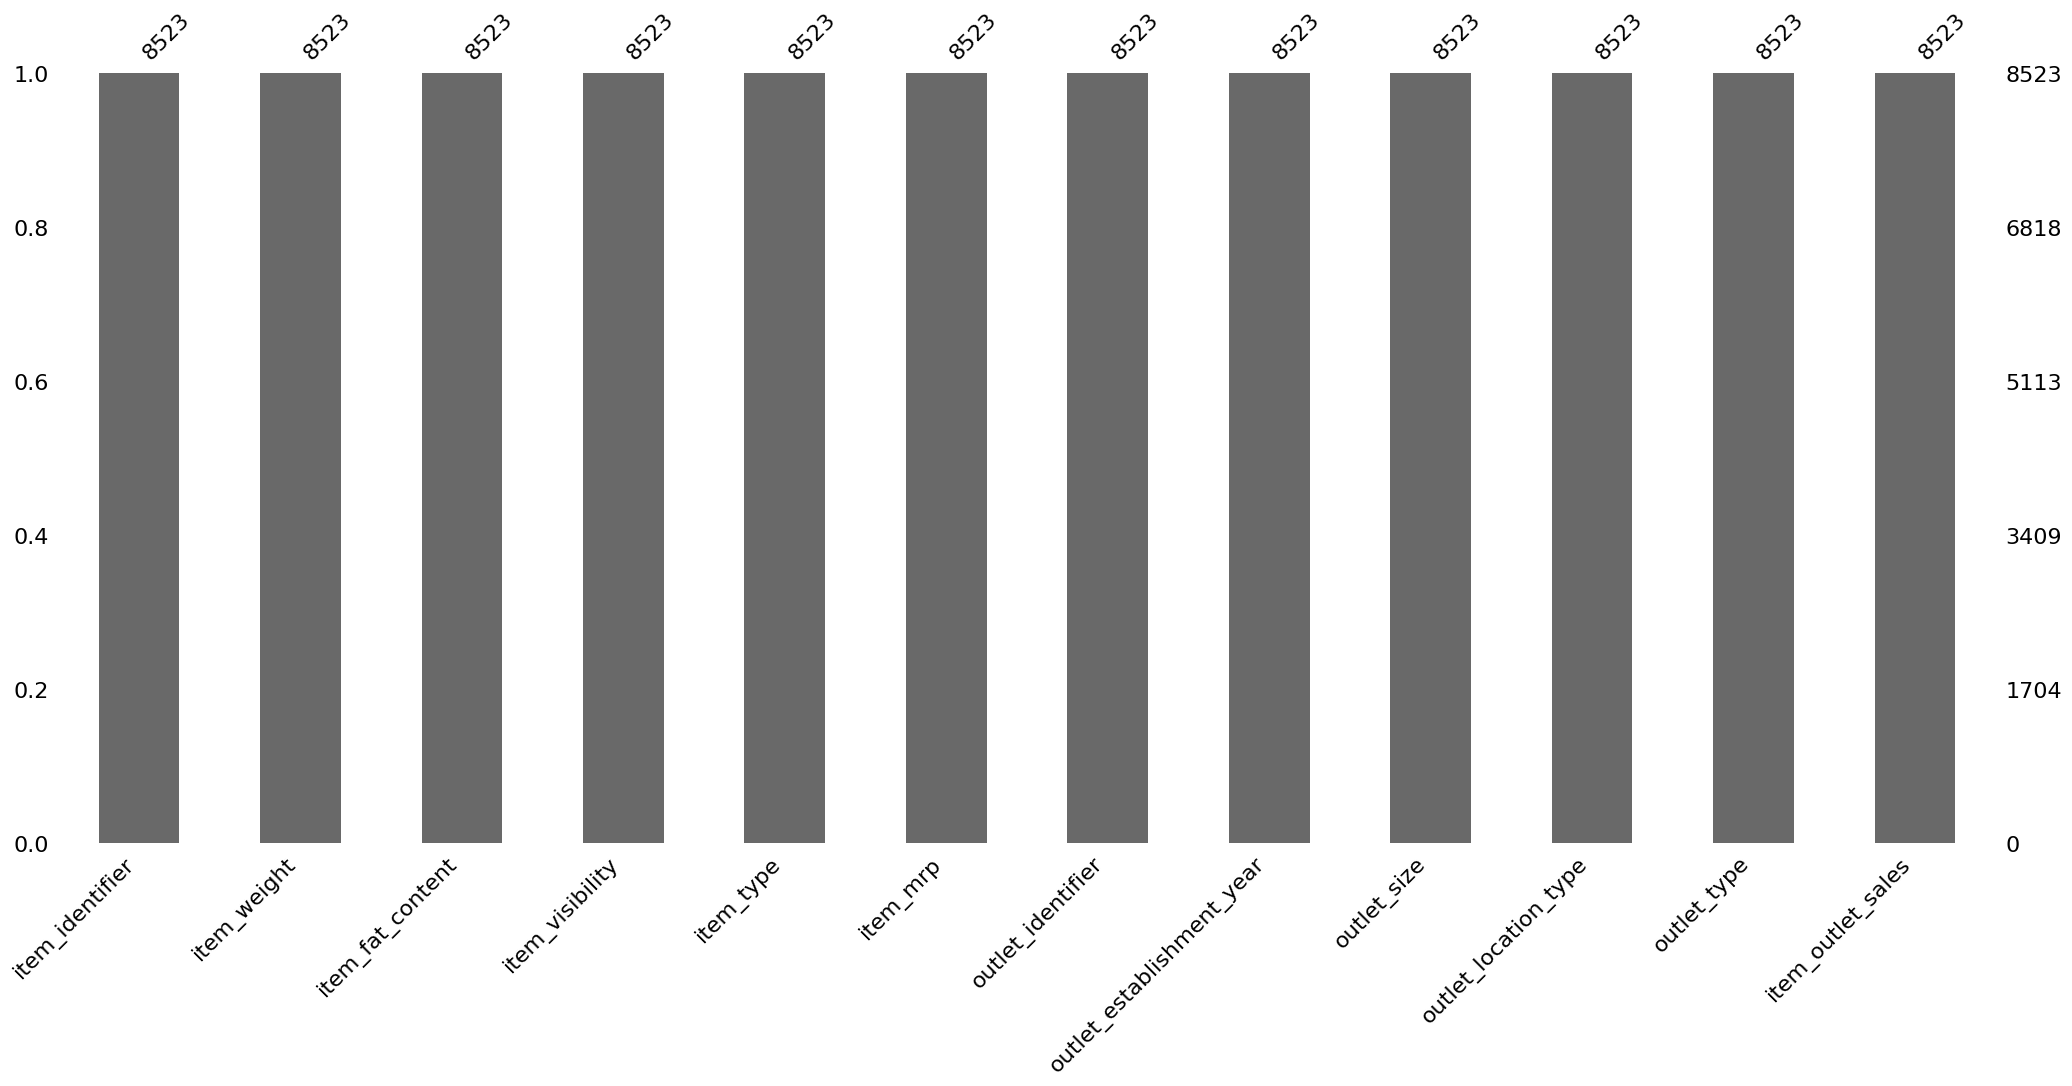

In [25]:
msn.bar(dataframe)

The figure shows there isn't any missing values in the dataset now.

### Further cleaning dataset

In [26]:
dataframe['outlet_identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [27]:
dataframe['outlet_establishment_year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [28]:
dataframe['outlet_size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [29]:
dataframe['outlet_location_type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [30]:
dataframe['outlet_type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [31]:
dataframe['item_fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [32]:
#Creating a dictionary to map all records of dataframe['item_fat_content']  to low or regular only respectively.

item_fat={
    'Low Fat': 'low',
    'LF': 'low',
    'low fat': 'low',
    'Regular': 'regular',
    'reg': 'regular', 
}

dataframe['item_fat_content'] = dataframe['item_fat_content'].map(item_fat)

dataframe['item_fat_content'].unique()

array(['low', 'regular'], dtype=object)

### Removing Outliers

item_weight                     AxesSubplot(0.125,0.11;0.0945122x0.77)
item_visibility              AxesSubplot(0.238415,0.11;0.0945122x0.77)
item_mrp                     AxesSubplot(0.351829,0.11;0.0945122x0.77)
outlet_establishment_year    AxesSubplot(0.465244,0.11;0.0945122x0.77)
item_outlet_sales            AxesSubplot(0.578659,0.11;0.0945122x0.77)
dtype: object

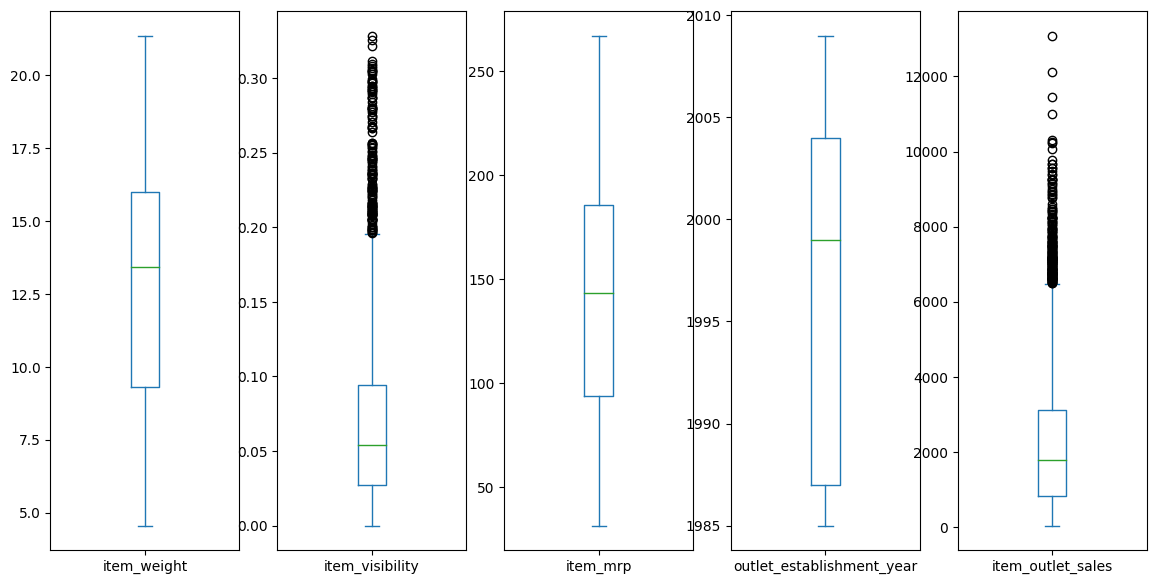

In [33]:
# checking for outliers
dataframe.plot(kind='box', subplots=True, layout=(1,7), figsize=(20,7))

In [34]:
# removing outliers
dataframe['item_visibility'] = dataframe[dataframe['item_visibility']<0.18]['item_visibility']

In [35]:
#Nan/null value had been created while removing the outliers in the item_visibility column
mean = dataframe['item_visibility'].mean()
dataframe['item_visibility'] = dataframe['item_visibility'].fillna(mean)

item_weight                     AxesSubplot(0.125,0.11;0.0945122x0.77)
item_visibility              AxesSubplot(0.238415,0.11;0.0945122x0.77)
item_mrp                     AxesSubplot(0.351829,0.11;0.0945122x0.77)
outlet_establishment_year    AxesSubplot(0.465244,0.11;0.0945122x0.77)
item_outlet_sales            AxesSubplot(0.578659,0.11;0.0945122x0.77)
dtype: object

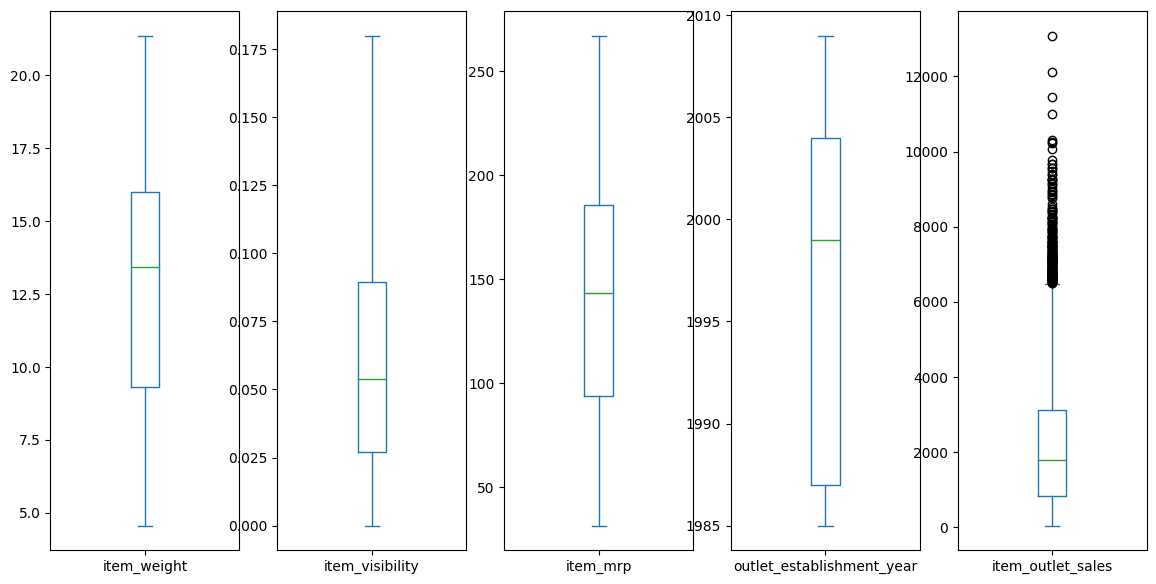

In [36]:
# checking for outliers
# Outliers in Item_Outlet_Sales are neglected as sales can sometime go high suddenly in some seasons

dataframe.plot(kind='box', subplots=True, layout=(1,7), figsize=(20,7))

### Some important visualizations

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

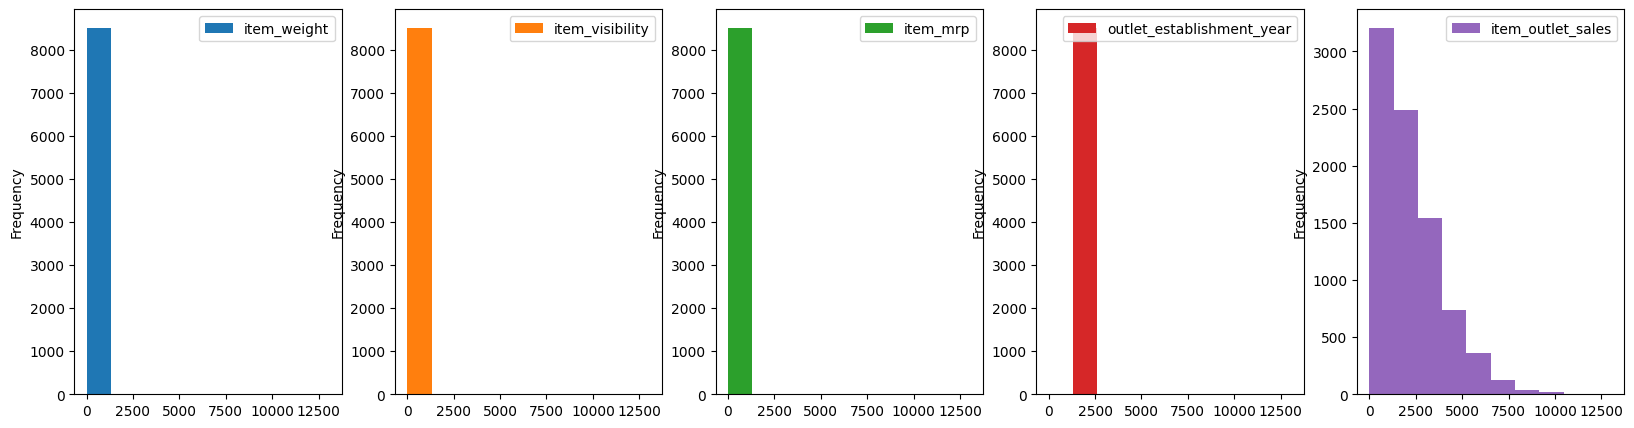

In [37]:
#univariate analysis
#finding pattern in data

dataframe.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

Similar data may be found in the dataset for item_weight, item_visibility, item_mrp, and outlet_establishment_year.
Even if item outlet_sales has some really large values, like 10,000, this is possible.
Because some festival seasons can see exponential growth in sales.

So, neither will we impute nor will we delete those high number.

<AxesSubplot:>

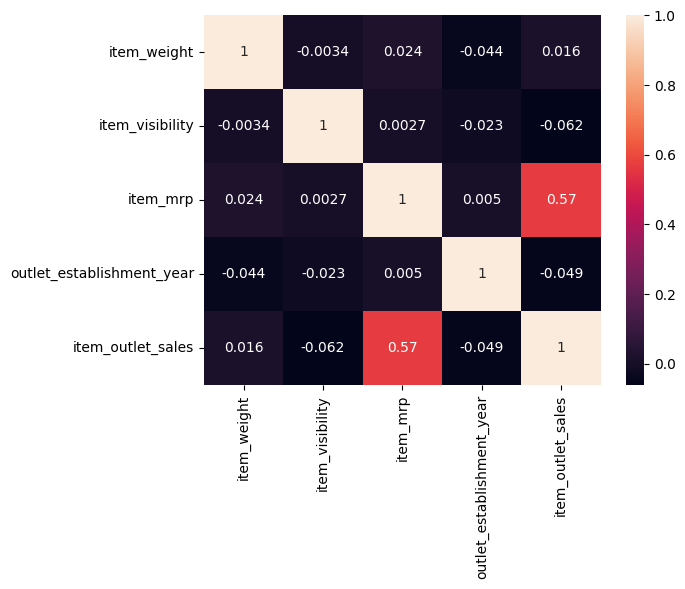

In [38]:
#bivariate Analysis
dataframeHeatMap = dataframe.corr() #correlation
sns.heatmap(dataframeHeatMap, annot=True)

The lighter the color, positively correlated.
The darker the color, negatively correlated.
Highest correlating value is 0.57.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: outlet_identifier, dtype: int64

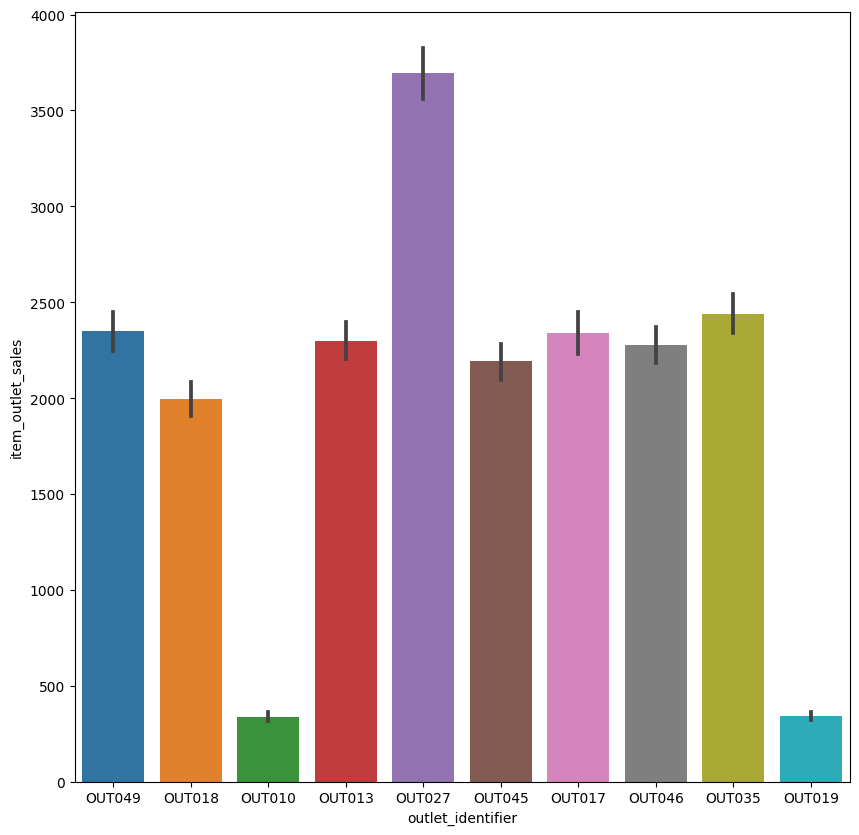

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x = dataframe['outlet_identifier'], y = dataframe['item_outlet_sales'])
dataframe['outlet_identifier'].value_counts()

As a result, we can take into account OUTLET IDENTIFIER for Model creation because there are only a few varieties and some Outlets have quite high sales.

In [40]:
dataframe = dataframe.drop('item_identifier', axis=1)

### Encoding

In [41]:
# to convert categorical text data into model-understandable numerical data, we use the Label Encoder class
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataframe['item_fat_content'] = label.fit_transform(dataframe['item_fat_content'])
dataframe['outlet_size'] = label.fit_transform(dataframe['outlet_size'])
dataframe['outlet_location_type'] = label.fit_transform(dataframe['outlet_location_type'])

In [42]:
# to convertcategorical text data into model-understandable numerical data
# One hot encoding
df = pd.get_dummies(dataframe['item_type'])
dataframe = pd.concat([dataframe, df], axis=1)

df = pd.get_dummies(dataframe['outlet_identifier'])
dataframe = pd.concat([dataframe, df], axis=1)

df = pd.get_dummies(dataframe['outlet_type'])
dataframe = pd.concat([dataframe, df], axis=1)

# df = pd.get_dummies(dataframe['item_fat_content'])
# dataframe = pd.concat([dataframe, df], axis=1)

# df = pd.get_dummies(dataframe['outlet_size'])
# dataframe = pd.concat([dataframe, df], axis=1)

# df = pd.get_dummies(dataframe['outlet_location_type'])
# dataframe = pd.concat([dataframe, df], axis=1)

What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns.

In [43]:
dataframe.shape

(8523, 41)

In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   int32  
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_identifier          8523 non-null   object 
 6   outlet_establishment_year  8523 non-null   int64  
 7   outlet_size                8523 non-null   int32  
 8   outlet_location_type       8523 non-null   int32  
 9   outlet_type                8523 non-null   object 
 10  item_outlet_sales          8523 non-null   float64
 11  Baking Goods               8523 non-null   uint8  
 12  Breads                     8523 non-null   uint8  
 13  Breakfast                  8523 non-null   uint8

In [45]:
dataframe = dataframe.drop(['item_type', 'outlet_identifier', 'outlet_type'], axis=1)


In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   int32  
 2   item_visibility            8523 non-null   float64
 3   item_mrp                   8523 non-null   float64
 4   outlet_establishment_year  8523 non-null   int64  
 5   outlet_size                8523 non-null   int32  
 6   outlet_location_type       8523 non-null   int32  
 7   item_outlet_sales          8523 non-null   float64
 8   Baking Goods               8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

In [47]:
#converting dataframe columns to same case - lowercase
dataframe.columns = dataframe.columns.str.lower()

In [48]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   int32  
 2   item_visibility            8523 non-null   float64
 3   item_mrp                   8523 non-null   float64
 4   outlet_establishment_year  8523 non-null   int64  
 5   outlet_size                8523 non-null   int32  
 6   outlet_location_type       8523 non-null   int32  
 7   item_outlet_sales          8523 non-null   float64
 8   baking goods               8523 non-null   uint8  
 9   breads                     8523 non-null   uint8  
 10  breakfast                  8523 non-null   uint8  
 11  canned                     8523 non-null   uint8  
 12  dairy                      8523 non-null   uint8  
 13  frozen foods               8523 non-null   uint8

### Input and Output Feature Split

In [49]:
x_orig = dataframe.drop('item_outlet_sales', axis=1) #independent features
y_orig = pd.DataFrame(dataframe['item_outlet_sales'], columns=['item_outlet_sales']) #dependent features

In [50]:
x_orig.shape 

(8523, 37)

In [51]:
y_orig.shape

(8523, 1)

# Sales prediction using Linear Regression

In [52]:
#feature scale
#the range of the data is to big
#standardizing the data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = scale.fit_transform(x_orig)
y = scale.fit_transform(y_orig)


#splitting the dataset into train,test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)


#fitting the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)


#performance metrics
from sklearn import metrics
print('R2:', metrics.r2_score(y_test, y_pred)) #goodness of fit measure 
#loss function
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


R2: 0.5590746152890456
MAE: 822.2765617066194
RMSE: 1096.2127970097497


# Sales predcition using KNN Regressor

In [53]:
#feature scale
#the range of the data is to big
#standardizing the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)


#splitting the dataset into train,test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)


#fitting the model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
score_max=0
rmse_max=0
i_max=0
for i in range(1,20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    y_test = scale.inverse_transform(y_test)
    y_pred = scale.inverse_transform(y_pred)
    
    #performance metrics
    r2 = metrics.r2_score(y_test, y_pred) #goodness of fit measure
    #loss function
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    #for best neighbors
    if (rmse > rmse_max):
        rmse_max=rmse
        score_max=r2
        i_max=i
                   
print('R2:', score_max)
print('MAE:', mae)
print('RMSE:', rmse_max)
print('Neighbor:', i_max)


R2: -1.5090299568567342
MAE: 3.2509418928331723e+61
RMSE: 4.19192206387387e+61
Neighbor: 19
